In [4]:
import tweepy
import webbrowser
import time
import pandas as pd
import datetime
from datetime import date,timedelta
import numpy as np 
import matplotlib.pyplot as plt
import warnings 
from wordcloud import WordCloud
from PIL import Image
import re
from bs4 import BeautifulSoup
import requests

%matplotlib inline
plt.style.use('fivethirtyeight')
warnings.filterwarnings('ignore')

In [5]:
import schedule

In [20]:
consumer_key = "bL50S54tJWbotMwyRlca6hpJc"
consumer_secret = "y88uIQ44evb3r2256eh4pIll3hkLSjvJFQJi7a8Hu0UC5haL6U"
callback_uri = 'oob'
auth = tweepy.OAuthHandler(consumer_key, consumer_secret, callback_uri)
redirect_url = auth.get_authorization_url()
webbrowser.open(redirect_url)
user_pin_input = input("whats the pin?")
auth.get_access_token(user_pin_input)


whats the pin?4969913


('1323638873600249858-9dikMIOocukH7U581879eAOKfhkvH6',
 'pdAtHtec8PyanKo5nzu1A9ERbMgesIfuV5LlkUkHW2mh1')

In [21]:
api = tweepy.API(auth)

In [22]:
me = api.me()

In [25]:
def tickerCloud():
    tickers = ["$AAPL", "$AMD", "$NIO", "$GOOGL", "$AMZN", "$SNAP", "$TWTR", "$FB", "$NFLX", "$TSLA", "$MSFT", "$JNJ","$PG","$NVDA" 
          "$V","$JPM","$UNH","$HD","$MA","$VZ","$DIS","PYPL","ADBE","CRM","PFE","WMT","CMCSA","T","MRK","INTC","TMO","ABT"
          "KO","PEP","BAC","MCD","COST","CSCO","ABBV","NKE","DHR","NEE","AVGO","QCOM","ACN","XOM","MDT","CVX","TXN","BMY","AMGN","UNP","LOW"]
    tickerdata = {key: 0 for key in tickers}
    tickerkeys = list(tickerdata.keys())

    today = datetime.date.today()
    yest = datetime.date.today()- timedelta(1)
    newstring = ""
    for i in range(len(tickers)):

        for r in api.search(tickers[i], until = yest,lang = "en"):
            newstring += r.text
    sstring = newstring.split()


    for j in range(0,len(tickerkeys)):
        tickerdata[tickerkeys[j]] = sstring.count(tickerkeys[j])
    wc = WordCloud(background_color="white",width=5000,height=5000, max_words=len(tickerkeys),relative_scaling=0.5,min_font_size=5).generate_from_frequencies(tickerdata)
    plt.axis('off')
    
    return wc

In [13]:
dates = []
dates.append(datetime.date.today()-timedelta(1))
print(dates)



[datetime.date(2020, 11, 4)]


In [18]:
print(dates)

[datetime.date(2020, 11, 4), datetime.date(2020, 11, 5)]


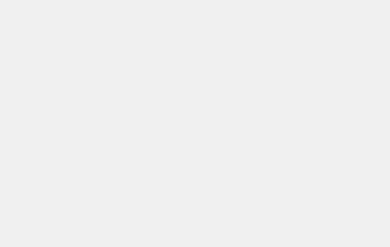

In [16]:


def tweeter():
    today = datetime.date.today()
    yest= dates[len(dates)-1]
    
    if((today-yest)==timedelta(1)):
        dates.append(today)
       
        return tickerCloud()
    else:
        return 0
def tweetnow():
    tweet = "Most talked about top 50 S&P 500 tickers on Twitter today"
    newimage = tweeter()
    if(newimage!=0):
        s = str(datetime.date.today())+".png"
        name = "C:\\Users\\faiza\\"
        name= name+s
        wc = newimage.to_file(name) 
        
        
        media = api.media_upload(s) 
        
        api.update_status(status = tweet,media_ids=[media.media_id])
        
tweetnow()

In [ ]:
schedule.every().day.at("18:00").do(tweetnow)


   
  
    
while True:
    schedule.run_pending()
    time.sleep(1)